# Convolution
Source [this medium article](https://medium.com/@geminae.stellae/introduction-to-gpu-programming-with-python-cuda-577bfdaa47f3)

## Create the dataset


In [34]:
import numpy as np

# Construct an image with repeated delta functions
deltas = np.zeros((4096, 4096))
# starting at 8 and 16 apart in each direction
deltas[8::16,8::16] = 1

# Visualization

## Visualizing our source image

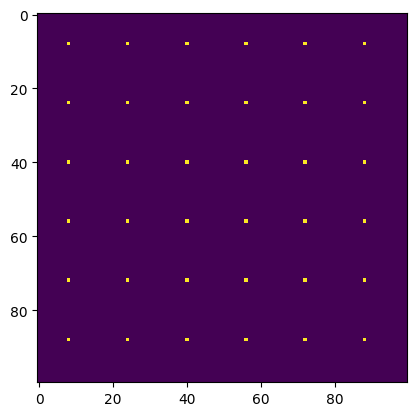

In [35]:
import pylab as pyl
# Necessary command to render a matplotlib image in a Jupyter notebook.
%matplotlib inline

# Display the image
pyl.imshow(deltas[0:100, 0:100])
pyl.show()

convolve our image with a Bicubic interpolation

## Demonstrate the convolution effect on a single square

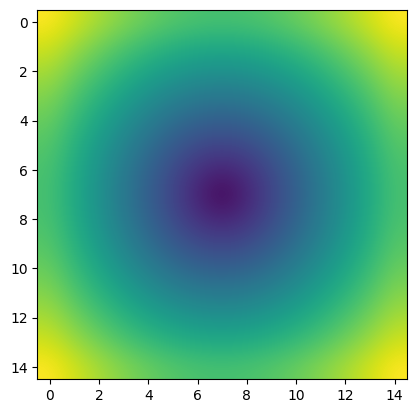

In [40]:
import pylab as pyl
# doing this on the CPU -- not timing it
x, y = np.meshgrid(np.linspace(-2, 2, 15), np.linspace(-2, 2, 15))
dst = np.sqrt(x*x + y*y)
sigma = 1
muu = 0.000
pyl.imshow(dst,interpolation='bicubic')
pyl.show()


## Demonstrate convolution effect on data set

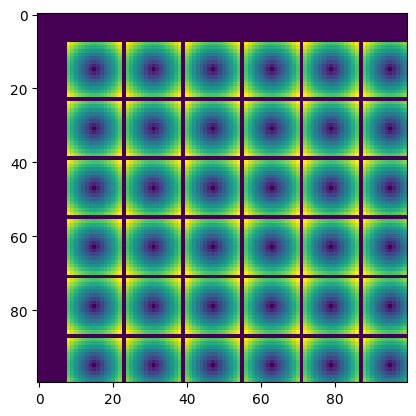

In [37]:
from scipy.signal import convolve2d as convolve2d_cpu
# run convolution on CPU and show plot
convolved_image_using_CPU = convolve2d_cpu(deltas, dst)
pyl.imshow(convolved_image_using_CPU[0:100, 0:100])
pyl.show()


# Time Convolution on the CPU using scipy
# Time Convolution on CPU

In [38]:
# run convolution on CPU and time it without plot for timer comparison
from scipy.signal import convolve2d as convolve2d_cpu
%timeit -n 1 -r 1 convolve2d_cpu(deltas, dst)

5.73 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Convolution on GPU using cupy

## Time convolution on the GPU

In [39]:
# Copy to GPU
import cupy as cp
from cupyx.scipy.signal import convolve2d as convolve2d_gpu

def transfer_to_gpu_compute_transfer_to_cpu():
    # copy the data to GPU memory
    deltas_gpu = cp.asarray(deltas)
    dst_gpu = cp.asarray(dst)
    # execute convolution
    convolved_image_using_GPU = convolve2d_gpu(deltas_gpu, dst_gpu)
    # Copy the data back to the CPU
    # So we can compare timings after the data lands in the same place for both
    convolved_image_using_GPU_copied_to_host = cp.asnumpy(convolved_image_using_GPU)
    return convolved_image_using_GPU_copied_to_host

%timeit -n 7 -r 1 transfer_to_gpu_compute_transfer_to_cpu()

97.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)
